# Compare the wavenumber spectra of ROMS surface SST and heatflux quantities


In [1]:
import dask
dask.config.set(scheduler='processes')


In [14]:
import xarray as xr
import numpy as np

from matplotlib import rcParams
from scipy.interpolate import interp1d

from sfoda.utils.maptools import plotmap
from sfoda.utils.isoslice import isoslice
from sfoda.roms.romsio import get_depth

rcParams["font.size"] = "14"
rcParams['axes.labelsize']='medium'

import matplotlib.pyplot as plt

from sfoda.utils.barycentric import BarycentricInterp

In [3]:
%matplotlib inline

rcParams["font.size"] = "12"
rcParams['axes.labelsize']='medium'

In [4]:
!ls ../ROMSdata/4DVAR/

archive_fwd2_6241.nc  archive_fwd_ver_6241.nc  sta_6241.nc  sta_ver_6241.nc
archive_fwd2_6245.nc  archive_fwd_ver_6245.nc  sta_6245.nc  sta_ver_6245.nc
archive_fwd2_6249.nc  archive_fwd_ver_6249.nc  sta_6249.nc  sta_ver_6249.nc
archive_fwd2_6253.nc  archive_fwd_ver_6253.nc  sta_6253.nc  sta_ver_6253.nc
archive_fwd2_6257.nc  archive_fwd_ver_6257.nc  sta_6257.nc  sta_ver_6257.nc
archive_fwd2_6261.nc  archive_fwd_ver_6261.nc  sta_6261.nc  sta_ver_6261.nc
archive_fwd2_6265.nc  archive_fwd_ver_6265.nc  sta_6265.nc  sta_ver_6265.nc
archive_fwd2_6269.nc  archive_fwd_ver_6269.nc  sta_6269.nc  sta_ver_6269.nc
archive_fwd2_6273.nc  archive_fwd_ver_6273.nc  sta_6273.nc  sta_ver_6273.nc
archive_fwd2_6277.nc  archive_fwd_ver_6277.nc  sta_6277.nc  sta_ver_6277.nc
archive_fwd2_6281.nc  archive_fwd_ver_6281.nc  sta_6281.nc  sta_ver_6281.nc
archive_fwd2_6285.nc  archive_fwd_ver_6285.nc  sta_6285.nc  sta_ver_6285.nc
archive_fwd2_6289.nc  archive_fwd_ver_6289.nc  sta_6289.nc  sta_ver_6289.nc
archive_fwd2

In [112]:
mapfile = '/group/pawsey0106/mrayson/DATA/COAST/GSHHS_shp/i/GSHHS_i_L1.shp'

# romsverfiles = ['../ROMSdata/4DVAR/archive_fwd_ver_6273.nc']
# roms4dvarfiles = ['../ROMSdata/4DVAR/archive_fwd2_6273.nc']
# mytime = '2017-03-05 00:00:00'

# romsverfiles = ['../ROMSdata/4DVAR/archive_fwd_ver_6301.nc']
# roms4dvarfiles = ['../ROMSdata/4DVAR/archive_fwd2_6301.nc']
# mytime = '2017-04-02 00:00:00'

# romsverfiles = ['../ROMSdata/4DVAR/archive_fwd_ver_6333.nc']
# roms4dvarfiles = ['../ROMSdata/4DVAR/archive_fwd2_6333.nc']
# mytime = '2017-05-08 00:00:00'

romsverfiles = ['../ROMSdata/4DVAR/archive_fwd_ver_6357.nc']
roms4dvarfiles = ['../ROMSdata/4DVAR/archive_fwd2_6357.nc']
mytime = '2017-06-01 00:00:00'


#romsfile = '../DATA/ROMS_NWS_2km_2017_2019_u_Harmonics.nc'

ds = xr.open_mfdataset(romsverfiles)
nt = ds.dims['ocean_time']
ds

<xarray.Dataset>
Dimensions:     (eta_rho: 482, eta_u: 482, eta_v: 481, ocean_time: 49, s_rho: 30, xi_rho: 1010, xi_u: 1009, xi_v: 1010)
Coordinates:
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lat_u       (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lat_v       (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lon_u       (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lon_v       (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2017-05-28 ... 2017-06-01
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
Dimensions without coordinates: eta_rho, eta_u, eta_v, xi_rho, xi_u, xi_v
Data variables:
    Cs_r        (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    h           (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    hc          float64 ...
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(49, 30, 482, 1010), meta=np.ndarray>
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(49, 30, 482, 1010), meta=np.ndarray>
    u           (ocean_time, s_rho, eta_u, xi_u) float32 dask.array<chunksize=(49, 30, 482, 1009), meta=np.ndarray>
    ubar        (ocean_time, eta_u, xi_u) float32 dask.array<chunksize=(49, 482, 1009), meta=np.ndarray>
    v           (ocean_time, s_rho, eta_v, xi_v) float32 dask.array<chunksize=(49, 30, 481, 1010), meta=np.ndarray>
    vbar        (ocean_time, eta_v, xi_v) float32 dask.array<chunksize=(49, 481, 1010), meta=np.ndarray>
    zeta        (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(49, 482, 1010), meta=np.ndarray>
Attributes:
    file:              ./outputs/his.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             NWS VERIFICATION ROMS
    var_info:          varinfo.dat
    rst_file:          ./outputs/rst.nc
    his_file:          ./outputs/his.nc
    avg_file:          ./outputs/avg.nc
    sta_file:          ./outputs/sta.nc
    grd_file:          grid.nc
    ini_file:          ini.nc
    tide_file:         tide.nc
    frc_file_01:       forcing.nc
    clm_file_01:       bry.nc
    script_file:       ocean.in
    spos_file:         stations.in
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    svn_url:           https://www.myroms.org/svn/src/trunk
    svn_rev:           1037
    code_dir:          /group/pawsey0219/ijanekovic/GIT/testing/trunk
    header_dir:        /group/pawsey0219/ijanekovic/NWS_ASSIM
    header_file:       nws_verification.h
    os:                Linux
    cpu:               x86_64
    compiler_system:   ftn
    compiler_command:  /opt/cray/pe/craype/2.5.13/bin/ftn
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3
    tiling:            024x010
    history:           Fri Oct 30 12:00:50 2020: ncks -7 --ppc default=.5 -vt...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       NWS_VERIFICATION, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, AN...
    NCO:               netCDF Operators version 4.7.6 (Homepage = http://nco....

In [113]:
ds.ocean_time[0].values,ds.ocean_time[-1].values

(numpy.datetime64('2017-05-28T00:00:00.000000000'),
 numpy.datetime64('2017-06-01T00:00:00.000000000'))

In [114]:
# Load the 4Dvar and clip the overlapping time dimensions
ds4d = xr.open_mfdataset(roms4dvarfiles)
ds4d = ds4d.isel(ocean_time=range(0,nt))
ds4d

<xarray.Dataset>
Dimensions:     (eta_rho: 482, eta_u: 482, eta_v: 481, ocean_time: 49, s_rho: 30, xi_rho: 1010, xi_u: 1009, xi_v: 1010)
Coordinates:
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lat_u       (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lat_v       (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lon_u       (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lon_v       (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2017-05-28 ... 2017-06-01
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
Dimensions without coordinates: eta_rho, eta_u, eta_v, xi_rho, xi_u, xi_v
Data variables:
    Cs_r        (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    h           (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    hc          float64 ...
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 30, 482, 1010), meta=np.ndarray>
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 30, 482, 1010), meta=np.ndarray>
    u           (ocean_time, s_rho, eta_u, xi_u) float64 dask.array<chunksize=(49, 30, 482, 1009), meta=np.ndarray>
    ubar        (ocean_time, eta_u, xi_u) float64 dask.array<chunksize=(49, 482, 1009), meta=np.ndarray>
    v           (ocean_time, s_rho, eta_v, xi_v) float64 dask.array<chunksize=(49, 30, 481, 1010), meta=np.ndarray>
    vbar        (ocean_time, eta_v, xi_v) float64 dask.array<chunksize=(49, 481, 1010), meta=np.ndarray>
    zeta        (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(49, 482, 1010), meta=np.ndarray>
Attributes:
    file:              fwd_outer2.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             NWS W4DVAR ROMS
    var_info:          varinfo.dat
    state_vector:      zeta, ubar, vbar, u, v, temp, salt, sustr, svstr, shfl...
    rst_file:          ./outputs/rst.nc
    his_file:          fwd_outer2.nc
    avg_file:          ./outputs/avg_outer2.nc
    sta_file:          ./outputs/sta.nc
    grd_file:          grid.nc
    ini_file:          ini.nc
    itl_file:          itl.nc
    nrm_file:          nrm_i.nc
    tlf_file:          ./outputs/tlf.nc
    obs_file:          obs.nc
    tide_file:         tide.nc
    frc_file_01:       forcing.nc
    clm_file_01:       bry.nc
    fwd_file:          fwd_outer1.nc
    script_file:       ocean.in
    apar_file:         s4dvar.in
    spos_file:         stations.in
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    ADM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    ADM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    svn_url:           https://www.myroms.org/svn/src/trunk
    svn_rev:           1037
    code_dir:          /group/pawsey0219/ijanekovic/GIT/testing/trunk
    header_dir:        /group/pawsey0219/ijanekovic/NWS_ASSIM
    header_file:       nws_w4dvar.h
    os:                Linux
    cpu:               x86_64
    compiler_system:   ftn
    compiler_command:  /opt/cray/pe/craype/2.5.13/bin/ftn
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3
    tiling:            024x010
    history:           Tue Oct 20 08:44:00 2020: ncks -7 --ppc default=.5 -vt...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       NWS_W4DVAR, ADD_FSOBC, ADD_M2OBC, ADJOINT, ADJUST_BOUN...
    NCO:               netCDF Operators version 4.7.6 (Homepage = http://nco....

In [115]:
xlims = (110,116.2)
ylims = (-20,-14)

xlims = (112,118.2)
ylims = (-19,-13)

# mytime = '2017-05-06 00:00:00'


In [116]:
temp = ds['temp'].sel(ocean_time=mytime, method='nearest').compute()
temp4d = ds4d['temp'].sel(ocean_time=mytime, method='nearest').compute()

zeta = ds['zeta'].sel(ocean_time=mytime, method='nearest').compute()
zeta4d = ds4d['zeta'].sel(ocean_time=mytime, method='nearest').compute()


In [117]:
# Interpolate with depth
Z = get_depth(ds.s_rho.values, ds.Cs_r.values, ds.hc.values, ds.h.values, zeta=zeta )
Z4d = get_depth(ds4d.s_rho.values, ds4d.Cs_r.values, ds4d.hc.values, ds4d.h.values, zeta=zeta4d )

Z[np.isnan(Z)]=0
Z4d[np.isnan(Z4d)]=0
Z.min(), Z.max()

(-5804.459278778563, 2.3968495133449323)

In [118]:
T10 = isoslice(temp.values, Z, -10).data
T10_4d = isoslice(temp4d.values, Z4d, -10).data

T50 = isoslice(temp.values, Z, -75).data
T50_4d = isoslice(temp4d.values, Z4d, -75).data

T100 = isoslice(temp.values, Z, -150).data
T100_4d = isoslice(temp4d.values, Z4d, -150).data

/home/mrayson/code/sfoda/sfoda/utils/isoslice.py:50: RuntimeWarning: divide by zero encountered in true_divide
  result = varl - propl*(varh-varl)/(proph-propl)
/home/mrayson/code/sfoda/sfoda/utils/isoslice.py:50: RuntimeWarning: invalid value encountered in true_divide
  result = varl - propl*(varh-varl)/(proph-propl)


In [119]:
T10.shape

(482, 1010)

In [120]:
# Interpolate the ROMS data onto a grid
dx = 0.02
xgrd = np.arange(xlims[0],xlims[1],dx)
ygrd = np.arange(ylims[0],ylims[1],dx)
X,Y = np.meshgrid(xgrd, ygrd)
ny,nx = X.shape

xyin = np.array([ds['lon_rho'].values.ravel(), ds['lat_rho'].values.ravel()]).T
xyout = np.array([X.ravel(), Y.ravel()]).T
Fi = BarycentricInterp(xyin, xyout)

In [121]:
# See here: https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

def window_sinetaper(M,K=3):
    # Generate the time-domain taper for the FFT
    h_tk = np.zeros((K,M))
    t=np.arange(M,dtype=np.double)
    for k in range(K):
        h_tk[k,:] = np.sqrt(2./(M+1.))*np.sin( (k+1)*np.pi*t / (M+1.) ) 

    return h_tk
 
def power_spectra_old(tsec, u_r, power=2., axis=-1):
    """
    Calculates the power spectral density from a real valued quanity
    
    """
    
    M = tsec.shape[0]
    dt = tsec[1]-tsec[0]
    #dt *= 2*np.pi
    M_2 = int(np.floor(M/2))
    
    #h_tk = window_sinetaper(M,K=K)
   
    # Weight the time-series and perform the fft
    u_r_t = u_r#*h_tk
    S_k = np.fft.fft(u_r_t, axis=axis)
    S = dt*np.abs(S_k)**power 
    #S = np.mean(S_k,axis=-2)
        
    omega = np.fft.fftfreq(int(M),d=dt)
    
    #domega = 2*np.pi/(M*dt)
    #domega = 1/(M*dt)
    
    # Extract the positive and negative frequencies
    omega_ccw = omega[0:M_2]
    #omega_cw = omega[M_2::] # negative frequencies
    S_ccw = S[...,0:M_2]
    #S_cw = S[...,M_2::]
    
    #return omega, S
    return omega_ccw,S_ccw/M

def quadwin(n):
    """
    Quadratic (or "Welch") window
    """
    t = np.arange(n)
    win = 1 - ((t - 0.5 * n) / (0.5 * n)) ** 2
    return win

def power_spectra(h, dt=1, axis=-1):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    winweights = quadwin(nt)
    #winweights = np.ones((nt,))
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice]
    ft = np.fft.fft(h, axis=axis)[...,pslice] 
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    
    # Normalization for Power Spectrum
    psraw /= nt**2
    
    # Convert PS to Power Spectral Density
    psdraw = psraw * dt * nt  # nt * dt is record length
    
    psdraw *= nt / (winweights**2).sum()
    
    return freqs,  psdraw

def fit_slope(highscale, lowscale, k, S):
    k_high = np.log10(2*np.pi/highscale)
    k_low = np.log10(2*np.pi/lowscale)
    k_i = np.linspace(k_high, k_low,100)

    Fi = interp1d(np.log10(k), np.log10(S))
    
    S_roms_i_log = Fi(k_i)
    p1 = np.polyfit(k_i, S_roms_i_log, 1)
    
    return p1, 10**k_i, 10**(p1[1]+p1[0]*k_i)


In [122]:
def plot_spectral_slope(Y, ax, ytext=1e-1, dx=2, color='k', lhigh=300, llow=50):
    Y=Y.ravel()
    Y[np.isnan(Y)] = 0
    Y_i = Fi(Y).reshape((ny,nx))
    
    k_x, S_zonal = power_spectra( Y_i-Y_i.mean(axis=0), dt=dx/(2*np.pi), axis=1)
    
    S_bar = np.median(S_zonal,axis=0)
    
    proms, ki, S_roms_fit = fit_slope(lhigh, llow, k_x, S_bar)

    ax.loglog(k_x, S_bar,color)
    ax.loglog(ki, S_roms_fit,'--', color=color)
    ax.text(0.09, ytext, 'k$\sim$%3.1f'%proms[0],color=color)
    
    return k_x, S_bar, Y_i


'20170601'

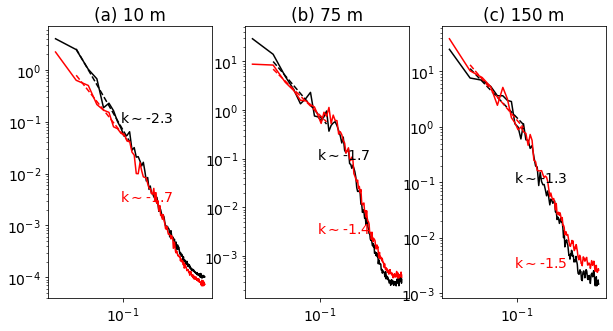

In [123]:
plt.figure(figsize=(10,5))
ax=plt.subplot(131)
k_x, S, T_i = plot_spectral_slope(T10, ax, color='k')
k_x, S, T_i_4d =plot_spectral_slope(T10_4d, ax, ytext=3e-3, color='r')
plt.title('(a) 10 m')

ax=plt.subplot(132)
_, _, T_i_75 = plot_spectral_slope(T50, ax, color='k')
_, _, T_i_75 =plot_spectral_slope(T50_4d, ax, ytext=3e-3, color='r')
plt.title('(b) 75 m')

ax=plt.subplot(133)
plot_spectral_slope(T100, ax, color='k')
plot_spectral_slope(T100_4d, ax, ytext=3e-3, color='r')
plt.title('(c) 150 m')


plt.savefig('../FIGURES/subsurface_temp_spectra_{}.png'.format(mytime[0:10].replace('-','')), dpi=150)
mytime[0:10].replace('-','')

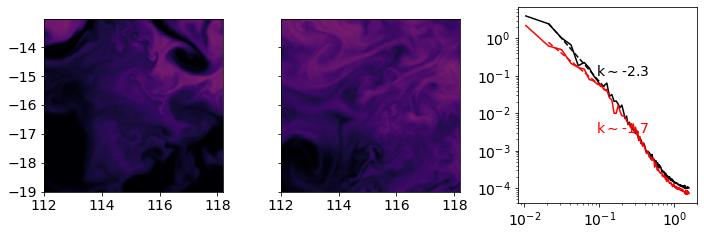

In [124]:
plt.figure(figsize=(10,3.5))

ax = plt.subplot(133)
k_x, S, T_i = plot_spectral_slope(T10, ax, color='k')
k_x, S, T_i_4d =plot_spectral_slope(T10_4d, ax, ytext=3e-3, color='r')

ax=plt.subplot(131)
plt.pcolormesh(X, Y, T_i, cmap='inferno', vmin=27, vmax=31)
ax.set_aspect('equal')

ax=plt.subplot(132)
plt.pcolormesh(X, Y, T_i_4d, cmap='inferno', vmin=27, vmax=31)
ax.set_aspect('equal')
ax.set_yticklabels([])
plt.tight_layout()

plt.savefig('../FIGURES/temp_10m_spectra_{}.png'.format(mytime[0:10].replace('-','')), dpi=150)


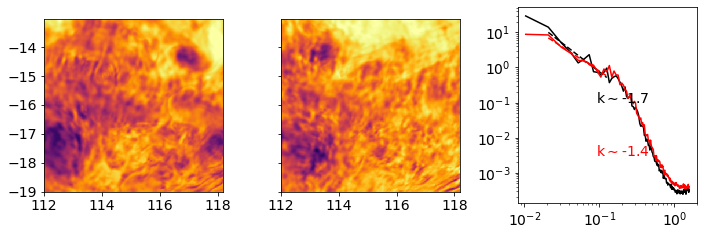

In [125]:
plt.figure(figsize=(10,3.5))

ax = plt.subplot(133)
k_x, S, T_i = plot_spectral_slope(T50, ax, color='k')
k_x, S, T_i_4d =plot_spectral_slope(T50_4d, ax, ytext=3e-3, color='r')

ax=plt.subplot(131)
plt.pcolormesh(X, Y, T_i, cmap='inferno', vmin=22, vmax=28)
ax.set_aspect('equal')

ax=plt.subplot(132)
plt.pcolormesh(X, Y, T_i_4d, cmap='inferno', vmin=22, vmax=28)
ax.set_aspect('equal')
ax.set_yticklabels([])
plt.tight_layout()

plt.savefig('../FIGURES/temp_75m_spectra_{}.png'.format(mytime[0:10].replace('-','')), dpi=150)


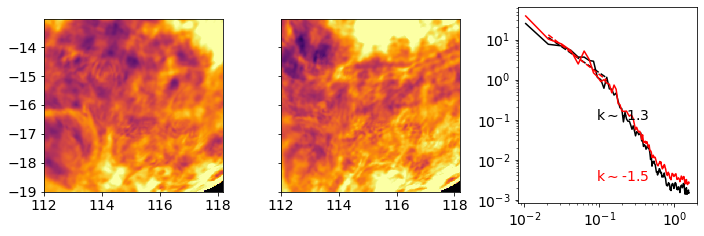

In [126]:
plt.figure(figsize=(10,3.5))

ax = plt.subplot(133)
k_x, S, T_i = plot_spectral_slope(T100, ax, color='k')
k_x, S, T_i_4d =plot_spectral_slope(T100_4d, ax, ytext=3e-3, color='r')

ax=plt.subplot(131)
plt.pcolormesh(X, Y, T_i, cmap='inferno', vmin=16, vmax=22)
ax.set_aspect('equal')

ax=plt.subplot(132)
plt.pcolormesh(X, Y, T_i_4d, cmap='inferno', vmin=16, vmax=22)
ax.set_aspect('equal')
ax.set_yticklabels([])
plt.tight_layout()

plt.savefig('../FIGURES/temp_150m_spectra_{}.png'.format(mytime[0:10].replace('-','')), dpi=150)
